In [1]:
%reload_ext autoreload
%autoreload 2

In [44]:
# !pip install scipy
# !pip install seaborn
# !python -m pip install statsmodels
from pathlib import Path
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("..")
from utils.data_utils import get_all_ext_files_in_path

In [3]:
p =  "/home/nobilm@usi.ch/wd/data/synthesized_datasets/maybridge/maybridge_mol_descriptors.csv"
p = Path(p)

In [4]:
df_maybridge_mol_descriptors = pd.read_csv(p)

In [5]:
df_maybridge_mol_descriptors.columns

Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons',
       ...
       'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole',
       'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'NAtoms',
       'NBonds'],
      dtype='object', length=212)

In [6]:
for i in range(len(df_maybridge_mol_descriptors.columns)):
    s = df_maybridge_mol_descriptors[df_maybridge_mol_descriptors.columns[i]].sum()
    print(i, df_maybridge_mol_descriptors.columns[i], s)

0 MaxAbsEStateIndex 579863.4173413132
1 MaxEStateIndex 579863.4173413132
2 MinAbsEStateIndex 9461.198100124351
3 MinEStateIndex -72264.11702878484
4 qed 31520.389525102997
5 SPS 673626.2169397058
6 MolWt 16904538.828
7 HeavyAtomMolWt 16146575.244000003
8 ExactMolWt 16877663.646484677
9 NumValenceElectrons 5943884
10 NumRadicalElectrons 0
11 MaxPartialCharge 14844.442079461784
12 MinPartialCharge -19880.976578805756
13 MaxAbsPartialCharge 20570.8383435379
14 MinAbsPartialCharge 14155.662914547334
15 FpDensityMorgan1 57275.536294359765
16 FpDensityMorgan2 91699.33560409732
17 FpDensityMorgan3 122986.84135845704
18 BCUT2D_MWHI 1554385.143939334
19 BCUT2D_MWLOW 513278.0251407944
20 BCUT2D_CHGHI 112500.01660177823
21 BCUT2D_CHGLO -108396.82436035288
22 BCUT2D_LOGPHI 115716.12126275014
23 BCUT2D_LOGPLOW -112164.43616139685
24 BCUT2D_MRHI 357125.8811975862
25 BCUT2D_MRLOW 4639.533402538178
26 AvgIpc 139230.00774815987
27 BalabanJ 105601.64480764995
28 BertzCT 38538741.88975457
29 Chi0 824477.

In [15]:
filelist = get_all_ext_files_in_path("/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge", ".txt")

In [16]:
filelist

['/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge/no_dup_aae_all_valid_vs_no_dup_Maybridge_HitDiscover_valid.txt',
 '/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge/no_dup_char_rnn_all_valid_vs_no_dup_Maybridge_HitDiscover_valid.txt',
 '/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge/no_dup_combinatorial_all_valid_vs_no_dup_Maybridge_HitDiscover_valid.txt',
 '/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge/no_dup_hmm_all_valid_vs_no_dup_Maybridge_HitDiscover_valid.txt',
 '/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge/no_dup_jtn_all_valid_vs_no_dup_Maybridge_HitDiscover_valid.txt',
 '/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge/no_dup_latent_gan_all_valid_vs_no_dup_Maybridge_HitDiscover_valid.txt',
 '/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge/no_dup_ngram_all_valid_vs_no_dup_Maybridge_HitDiscover_valid.txt',
 '/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge/no_dup_vae_all_valid_vs_no_dup_Maybridge_HitDisco

In [17]:
# now join all mols rediscovered in maybridge
# p = "/home/nobilm@usi.ch/wd/data/exact_matches_txts/maybridge/no_dup_aae_all_valid_vs_no_dup_Maybridge_HitDiscover_valid.txt"
# p = Path(p)
lines = []
for p in filelist:
    with open(p) as file:
        for line in file:
            lines.append(line.rstrip())

In [18]:
lines

['no_dup_aae_all_valid smi: CN(C)S(=O)(=O)c1cccc2c(N)cccc12, no_dup_Maybridge_HitDiscover_valid smi: CN(C)S(=O)(=O)c1cccc2c(N)cccc12, tanimoto: 1.0, natoms: 17',
 'no_dup_aae_all_valid smi: N#Cc1cccnc1N1CCN(C(=O)Nc2ccccc2)CC1, no_dup_Maybridge_HitDiscover_valid smi: N#Cc1cccnc1N1CCN(C(=O)Nc2ccccc2)CC1, tanimoto: 1.0, natoms: 23',
 'no_dup_aae_all_valid smi: O=C(c1ccccc1)N1CCN(CCOc2ccccc2)CC1, no_dup_Maybridge_HitDiscover_valid smi: O=C(c1ccccc1)N1CCN(CCOc2ccccc2)CC1, tanimoto: 1.0, natoms: 23',
 'no_dup_aae_all_valid smi: COC(=O)c1cccc(NC(=O)c2ccccc2Cl)c1, no_dup_Maybridge_HitDiscover_valid smi: COC(=O)c1cccc(NC(=O)c2ccccc2Cl)c1, tanimoto: 1.0, natoms: 20',
 'no_dup_aae_all_valid smi: CCOC(=O)c1sc(NC(=O)c2cccs2)nc1C, no_dup_Maybridge_HitDiscover_valid smi: CCOC(=O)c1sc(NC(=O)c2cccs2)nc1C, tanimoto: 1.0, natoms: 19',
 'no_dup_aae_all_valid smi: CCOC(=O)c1[nH]c(C)c(C(=O)OCC)c1C, no_dup_Maybridge_HitDiscover_valid smi: CCOC(=O)c1[nH]c(C)c(C(=O)OCC)c1C, tanimoto: 1.0, natoms: 17',
 'no_dup

In [19]:
exact_matches_smi = []
for s in lines:
    start_smi = s.find(":")+1
    end_smi = s.find(",")
    exact_matches_smi.append(s[start_smi:end_smi].strip())    

In [20]:
len(exact_matches_smi)

525

In [22]:
class MolStruct:
    def __init__(self, smile):
        self.smile = smile
        self.mol = Chem.MolFromSmiles(smile)
        self.descriptors = Chem.Descriptors.CalcMolDescriptors(self.mol)
        self.descriptors["NAtoms"] = self.mol.GetNumAtoms()
        self.descriptors["NBonds"] = len(list(self.mol.GetBonds()))

In [23]:
out = [MolStruct(smi) for smi in exact_matches_smi]
df_exact_matches_descriptors = pd.DataFrame([el.descriptors for el in out])

In [30]:
# df_exact_matches_descriptors

In [26]:
df_maybridge_mol_descriptors[df_maybridge_mol_descriptors.columns[i]].std(), df_exact_matches_descriptors[df_maybridge_mol_descriptors.columns[i]].std()

(6.412248036311592, 4.179464605799468)

In [27]:
l1 = df_maybridge_mol_descriptors[df_maybridge_mol_descriptors.columns[0]].to_list()
l2 = df_exact_matches_descriptors[df_maybridge_mol_descriptors.columns[0]].to_list()
ttest_ind(l1, l2)
# p val is very small -> the two things come from 2 different dists

TtestResult(statistic=1.859109816488989, pvalue=0.06301730055134398, df=51257.0)

In [29]:
l1 = df_maybridge_mol_descriptors[df_maybridge_mol_descriptors.columns[-1]].to_list()
l2 = df_exact_matches_descriptors[df_maybridge_mol_descriptors.columns[-1]].to_list()
out = ttest_ind(l1, l2)
out, df_maybridge_mol_descriptors.columns[-1], out[1], type(out[1])

(TtestResult(statistic=20.172582369741793, pvalue=3.8225889243400736e-90, df=51257.0),
 'NBonds',
 3.8225889243400736e-90,
 numpy.float64)

In [30]:
significant_cols = []
for i in range(len(df_maybridge_mol_descriptors.columns)):
    l1 = df_maybridge_mol_descriptors[df_maybridge_mol_descriptors.columns[i]].to_list()
    l2 = df_exact_matches_descriptors[df_maybridge_mol_descriptors.columns[i]].to_list()
    out = ttest_ind(l1, l2)
    if out[1] < .05:
        significant_cols.append(df_maybridge_mol_descriptors.columns[i])

In [31]:
len(significant_cols), significant_cols

(132,
 ['MinAbsEStateIndex',
  'MinEStateIndex',
  'qed',
  'SPS',
  'MolWt',
  'HeavyAtomMolWt',
  'ExactMolWt',
  'NumValenceElectrons',
  'FpDensityMorgan1',
  'FpDensityMorgan2',
  'FpDensityMorgan3',
  'AvgIpc',
  'BalabanJ',
  'BertzCT',
  'Chi0',
  'Chi0n',
  'Chi0v',
  'Chi1',
  'Chi1n',
  'Chi1v',
  'Chi2n',
  'Chi2v',
  'Chi3n',
  'Chi3v',
  'Chi4n',
  'Chi4v',
  'HallKierAlpha',
  'Kappa1',
  'Kappa2',
  'Kappa3',
  'LabuteASA',
  'PEOE_VSA10',
  'PEOE_VSA11',
  'PEOE_VSA14',
  'PEOE_VSA2',
  'PEOE_VSA4',
  'PEOE_VSA5',
  'PEOE_VSA6',
  'PEOE_VSA7',
  'PEOE_VSA8',
  'PEOE_VSA9',
  'SMR_VSA1',
  'SMR_VSA10',
  'SMR_VSA3',
  'SMR_VSA4',
  'SMR_VSA5',
  'SMR_VSA7',
  'SMR_VSA9',
  'SlogP_VSA1',
  'SlogP_VSA10',
  'SlogP_VSA11',
  'SlogP_VSA12',
  'SlogP_VSA2',
  'SlogP_VSA3',
  'SlogP_VSA4',
  'SlogP_VSA5',
  'SlogP_VSA6',
  'SlogP_VSA7',
  'SlogP_VSA8',
  'TPSA',
  'EState_VSA1',
  'EState_VSA10',
  'EState_VSA2',
  'EState_VSA3',
  'EState_VSA4',
  'EState_VSA5',
  'EState_VS

In [32]:
df_significant = df_maybridge_mol_descriptors[significant_cols]

In [33]:
df_significant.shape


(50734, 132)

In [34]:
# df_significant.values

In [36]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = df_significant.columns 

In [37]:
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(df_significant.values, i) 
                          for i in range(len(df_significant.columns))] 

/home/nobilm@usi.ch/miniconda3/envs/analysis_venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [38]:
vif_data["VIF"] = [(np.format_float_positional(el, precision=3))  for el in vif_data["VIF"].tolist()]

In [39]:
vif_data

,feature,VIF
0,MinAbsEStateIndex,3.831
1,MinEStateIndex,11.308
2,qed,40.135
3,SPS,72.177
4,MolWt,238128554.922
...,...,...
127,fr_sulfonamd,6.518
128,fr_thiazole,2.004
129,fr_unbrch_alkane,2.662
130,NAtoms,inf


In [40]:
def cal_vif(x, thresh = 2):
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    for i in range(1,k):
        a = np.argmax(vif)
        print('Max vif is for variable no:',a)
        if (vif[a]<=thresh):
            break
        if (i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif (i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
    return output

In [41]:
x = cal_vif(df_significant)
featureVIF = x.columns.tolist()
print("Selected_features: ",featureVIF)

/home/nobilm@usi.ch/miniconda3/envs/analysis_venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Max vif is for variable no: 76


/home/nobilm@usi.ch/miniconda3/envs/analysis_venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Max vif is for variable no: 78


/home/nobilm@usi.ch/miniconda3/envs/analysis_venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Max vif is for variable no: 79


/home/nobilm@usi.ch/miniconda3/envs/analysis_venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Max vif is for variable no: 79


/home/nobilm@usi.ch/miniconda3/envs/analysis_venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Max vif is for variable no: 88
Max vif is for variable no: 4
Max vif is for variable no: 5
Max vif is for variable no: 28
Max vif is for variable no: 122
Max vif is for variable no: 5
Max vif is for variable no: 14
Max vif is for variable no: 12
Max vif is for variable no: 11
Max vif is for variable no: 118
Max vif is for variable no: 80
Max vif is for variable no: 11
Max vif is for variable no: 11
Max vif is for variable no: 19
Max vif is for variable no: 4
Max vif is for variable no: 72
Max vif is for variable no: 10
Max vif is for variable no: 5
Max vif is for variable no: 67
Max vif is for variable no: 43
Max vif is for variable no: 75
Max vif is for variable no: 10
Max vif is for variable no: 62
Max vif is for variable no: 10
Max vif is for variable no: 14
Max vif is for variable no: 13
Max vif is for variable no: 8
Max vif is for variable no: 64
Max vif is for variable no: 8
Max vif is for variable no: 8
Max vif is for variable no: 47
Max vif is for variable no: 26
Max vif is for

In [42]:
# 2 Selected_features 9:  ['PEOE_VSA5', 'PEOE_VSA6', 'SlogP_VSA11', 'FractionCSP3', 'fr_imidazole', 'fr_morpholine', 'fr_nitro', 'fr_piperzine', 'fr_sulfonamd']
# 1.5 Selected_features 8:  ['PEOE_VSA5', 'PEOE_VSA6', 'SlogP_VSA11', 'fr_imidazole', 'fr_morpholine', 'fr_nitro', 'fr_piperzine', 'fr_sulfonamd']
# 1.1 Selected_features 7:  ['PEOE_VSA5', 'SlogP_VSA11', 'fr_imidazole', 'fr_morpholine', 'fr_nitro', 'fr_piperzine', 'fr_sulfonamd']

x = cal_vif(df_significant, 1.05)
featureVIF = x.columns.tolist()
print("Selected_features: ",featureVIF)

/home/nobilm@usi.ch/miniconda3/envs/analysis_venv/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Max vif is for variable no: 76


KeyboardInterrupt: 

<Axes: >

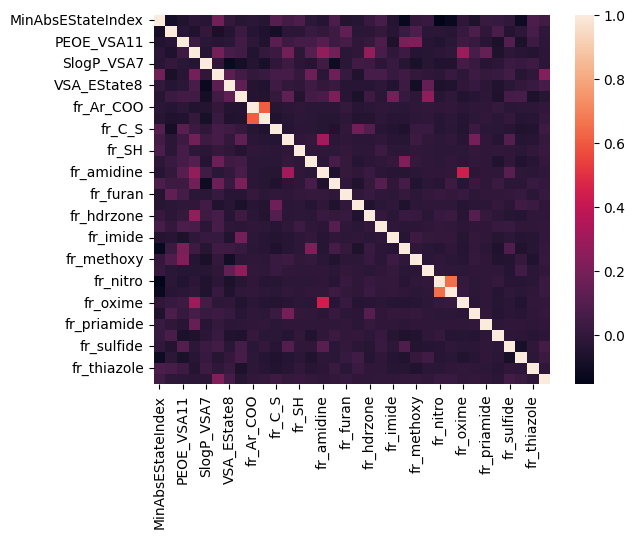

In [45]:
# Selected_features:  ['MinAbsEStateIndex', 'PEOE_VSA10', 'PEOE_VSA11', 'SMR_VSA4', 'SlogP_VSA7', 'VSA_EState7', 'VSA_EState8', 'NumAliphaticHeterocycles', 'fr_Ar_COO', 'fr_COO', 'fr_C_S', 'fr_Imine', 'fr_SH', 'fr_allylic_oxid', 'fr_amidine', 'fr_bicyclic', 'fr_furan', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_ketone_Topliss', 'fr_methoxy', 'fr_morpholine', 'fr_nitro', 'fr_nitro_arom_nonortho', 'fr_oxime', 'fr_phenol_noOrthoHbond', 'fr_priamide', 'fr_pyridine', 'fr_sulfide', 'fr_sulfonamd', 'fr_thiazole', 'fr_unbrch_alkane']
l = ['MinAbsEStateIndex', 'PEOE_VSA10', 'PEOE_VSA11', 'SMR_VSA4', 'SlogP_VSA7', 'VSA_EState7', 'VSA_EState8', 'NumAliphaticHeterocycles', 'fr_Ar_COO', 'fr_COO', 'fr_C_S', 'fr_Imine', 'fr_SH', 'fr_allylic_oxid', 'fr_amidine', 'fr_bicyclic', 'fr_furan', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_ketone_Topliss', 'fr_methoxy', 'fr_morpholine', 'fr_nitro', 'fr_nitro_arom_nonortho', 'fr_oxime', 'fr_phenol_noOrthoHbond', 'fr_priamide', 'fr_pyridine', 'fr_sulfide', 'fr_sulfonamd', 'fr_thiazole', 'fr_unbrch_alkane']
updated = df_significant[l]
c =updated.corr()
sns.heatmap(c)

In [47]:
cov = updated.cov()
cov

,MinAbsEStateIndex,PEOE_VSA10,PEOE_VSA11,SMR_VSA4,SlogP_VSA7,VSA_EState7,VSA_EState8,NumAliphaticHeterocycles,fr_Ar_COO,fr_COO,...,fr_nitro,fr_nitro_arom_nonortho,fr_oxime,fr_phenol_noOrthoHbond,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_thiazole,fr_unbrch_alkane
MinAbsEStateIndex,0.039263,-0.118351,-0.049995,-0.019514,-0.025812,0.124708,-0.000550,-0.003676,-0.000909,-0.001786,...,-0.010138,-0.005135,-0.000288,-0.002177,0.000355,0.000784,-0.000262,-0.006846,0.003686,0.004551
PEOE_VSA10,-0.118351,47.467720,-1.196945,-1.825846,-0.006232,-1.804319,-0.685760,0.083563,-0.044463,-0.105396,...,-0.046808,-0.048407,0.010805,0.087334,-0.005381,0.177107,-0.133592,-0.034597,0.093217,-0.058641
PEOE_VSA11,-0.049995,-1.196945,26.637972,0.667743,-0.578465,-0.567690,-0.376132,0.120972,-0.013281,-0.073851,...,-0.081956,-0.030829,0.032418,0.006728,-0.017787,-0.141873,0.205108,-0.112157,0.040571,-0.053838
SMR_VSA4,-0.019514,-1.825846,0.667743,19.399191,-0.687065,2.928397,0.711164,0.100743,-0.033322,0.007298,...,-0.034945,-0.011082,0.239942,0.044271,0.069896,-0.103218,-0.036527,-0.040536,-0.049008,-0.060533
SlogP_VSA7,-0.025812,-0.006232,-0.578465,-0.687065,15.280771,-0.142537,-1.289284,-0.192383,-0.028153,-0.081178,...,-0.071886,-0.044723,0.034680,0.012830,-0.013486,-0.033060,0.037187,0.013618,0.026429,-0.049283
VSA_EState7,0.124708,-1.804319,-0.567690,2.928397,-0.142537,12.175098,1.050436,0.081931,0.000571,0.016526,...,-0.027821,0.011015,-0.012185,0.017001,0.001449,0.021297,0.072324,-0.037543,-0.008513,0.470960
VSA_EState8,-0.000550,-0.685760,-0.376132,0.711164,-1.289284,1.050436,6.677411,0.184937,-0.018687,-0.034934,...,-0.059158,-0.030874,-0.003894,0.004246,-0.006871,-0.051354,-0.028788,0.001216,0.011855,0.082591
NumAliphaticHeterocycles,-0.003676,0.083563,0.120972,0.100743,-0.192383,0.081931,0.184937,0.294989,-0.003975,-0.006563,...,-0.006621,-0.001789,-0.005056,-0.002975,-0.001084,-0.011821,0.012622,0.009586,-0.008487,-0.010957
fr_Ar_COO,-0.000909,-0.044463,-0.013281,-0.033322,-0.028153,0.000571,-0.018687,-0.003975,0.024378,0.024198,...,-0.000353,-0.000094,-0.000661,-0.000406,-0.000144,0.000270,-0.001773,-0.000800,-0.000704,-0.000406
fr_COO,-0.001786,-0.105396,-0.073851,0.007298,-0.081178,0.016526,-0.034934,-0.006563,0.024198,0.064254,...,-0.002580,-0.000934,-0.001904,-0.000835,-0.000076,-0.002801,-0.000183,-0.003186,-0.001889,0.000724


In [58]:
df_significant['fr_Ar_COO'].std()**2

0.024377786626181362

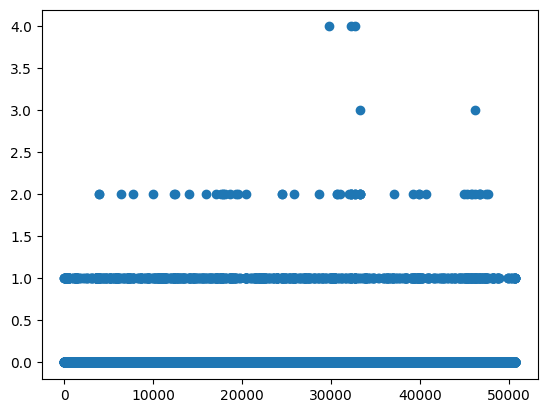

In [56]:
plt.scatter(  [i for i in range(df_significant['fr_Ar_COO'].shape[0])],  df_significant['fr_Ar_COO'])

<Axes: >

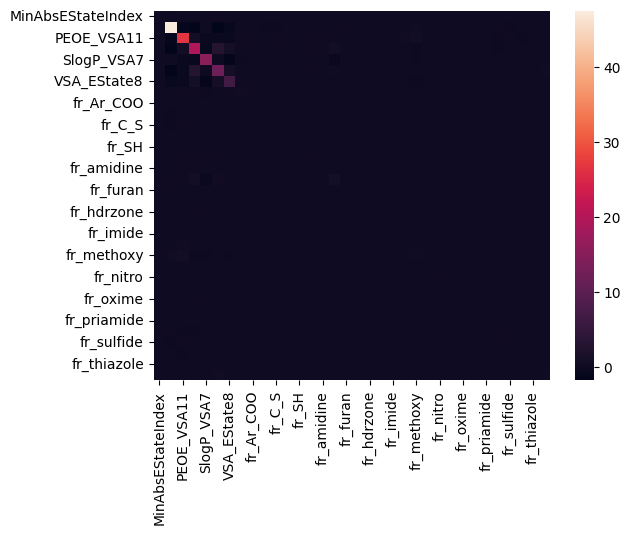

In [59]:
sns.heatmap(cov)

In [ ]:
updated = df_significant[['PEOE_VSA5', 'SlogP_VSA11', 'fr_imidazole', 'fr_morpholine', 'fr_nitro', 'fr_piperzine', 'fr_sulfonamd']]
c =updated.corr()

<Axes: >

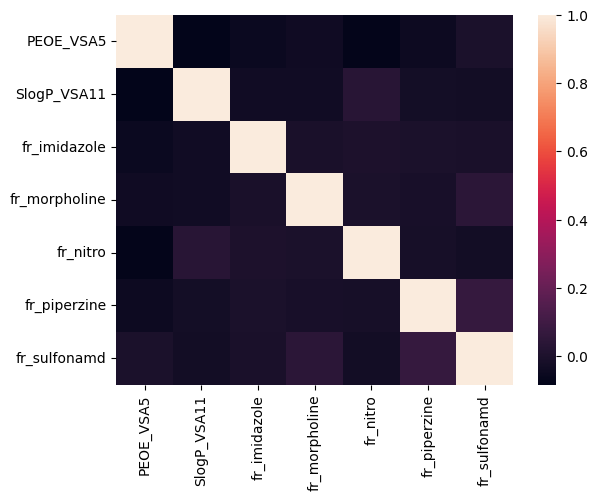

In [ ]:
sns.heatmap(c)

In [ ]:
cov = updated.cov()
cov
# https://stats.stackexchange.com/questions/488989/in-feature-selection-what-is-the-reason-for-considering-removing-low-variance-f
# If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed

,PEOE_VSA5,SlogP_VSA11,fr_imidazole,fr_morpholine,fr_nitro,fr_piperzine,fr_sulfonamd
PEOE_VSA5,49.056079,-2.684506,-0.058621,-0.043703,-0.173823,-0.065807,-0.013427
SlogP_VSA11,-2.684506,21.020623,-0.023807,-0.024747,0.049306,-0.023084,-0.045662
fr_imidazole,-0.058621,-0.023807,0.024104,-0.000214,-0.000006,-0.000148,-0.000542
fr_morpholine,-0.043703,-0.024747,-0.000214,0.025673,-0.000357,-0.000485,0.002066
fr_nitro,-0.173823,0.049306,-0.000006,-0.000357,0.107775,-0.001020,-0.003187
fr_piperzine,-0.065807,-0.023084,-0.000148,-0.000485,-0.001020,0.037329,0.004149
fr_sulfonamd,-0.013427,-0.045662,-0.000542,0.002066,-0.003187,0.004149,0.094647


In [ ]:
sns.heatmap(cov)
# Covariance: Independence of variables implies a covariance of 0 as well. 
# However, the reverse is not necessarily true. A covariance of 0 does not always imply independence.

In [ ]:
# from scipy.stats import chi2_contingency

# def calc_MI(x, y, bins=5):
#     c_xy = np.histogram2d(x, y, bins)[0]
#     g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
#     mi = 0.5 * g / c_xy.sum()
#     return mi

# calc_MI(updated['PEOE_VSA5'].tolist(), updated['SlogP_VSA11'].tolist())
# calc_MI(updated['SlogP_VSA11'].tolist(), updated['fr_morpholine'].tolist())